I have implemented a Tensorflow model from scratch.

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '0'  # Ensure hash-based operations are deterministic
random.seed(42)
np.random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Ensure deterministic operations

# Import TensorFlow and configure threading
import tensorflow as tf

# Set TensorFlow random seed
tf.random.set_seed(42)

# Configure TensorFlow threading before any TF operation
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
filepath = r"C:\Users\rayar\LungCap.xls"
df = pd.read_excel(filepath)
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [3]:
df.isna().any()

LungCap(cc)       False
Age( years)       False
Height(inches)    False
Smoke             False
Gender            False
Caesarean         False
dtype: bool

In [4]:
df.Smoke.unique()

array(['no', 'yes'], dtype=object)

In [5]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [6]:
df.Caesarean.unique()

array(['no', 'yes'], dtype=object)

### Data Visualization

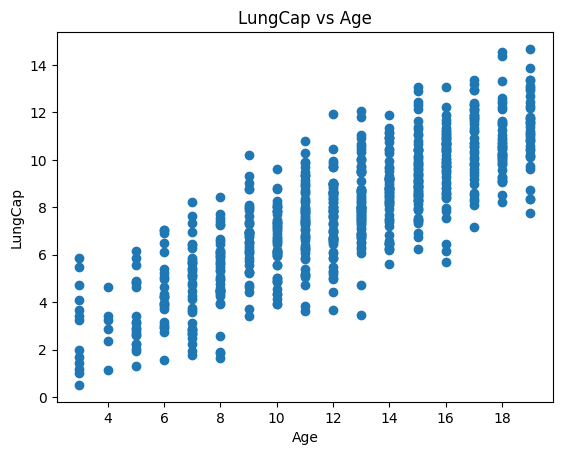

In [7]:
plt.xlabel("Age")
plt.ylabel("LungCap")
plt.title("LungCap vs Age")

plt.scatter(df['Age( years)'],df['LungCap(cc)'])
plt.show()

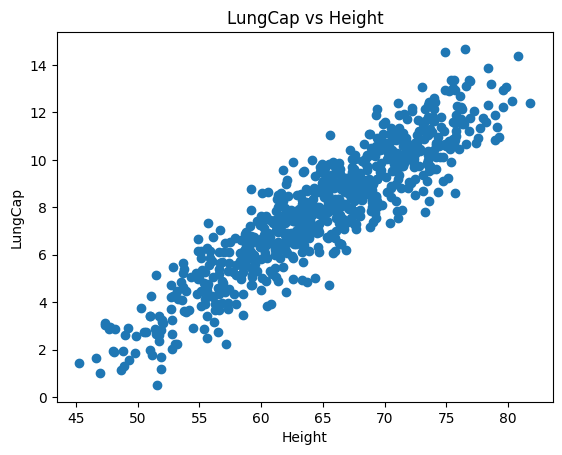

In [8]:
plt.xlabel("Height")
plt.ylabel("LungCap")
plt.title("LungCap vs Height")

plt.scatter(df['Height(inches)'],df['LungCap(cc)'])
plt.show()

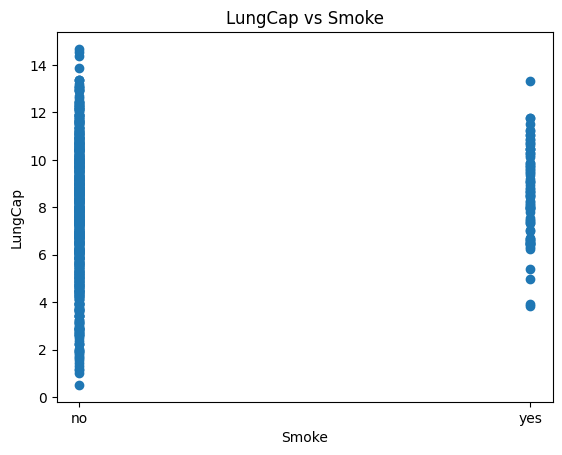

In [9]:
plt.xlabel("Smoke")
plt.ylabel("LungCap")
plt.title("LungCap vs Smoke")

plt.scatter(df['Smoke'],df['LungCap(cc)'])
plt.show()

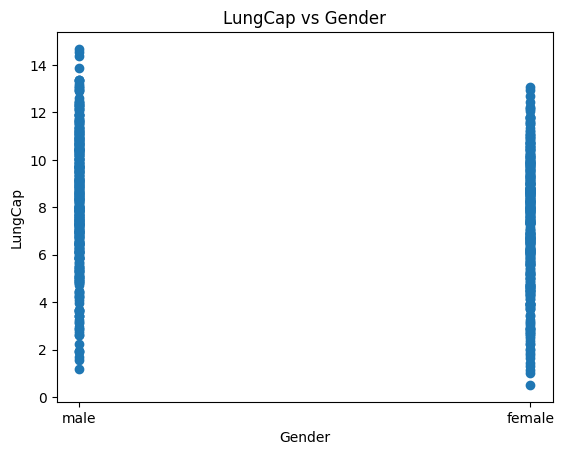

In [10]:
plt.xlabel("Gender")
plt.ylabel("LungCap")
plt.title("LungCap vs Gender")

plt.scatter(df['Gender'],df['LungCap(cc)'])
plt.show()

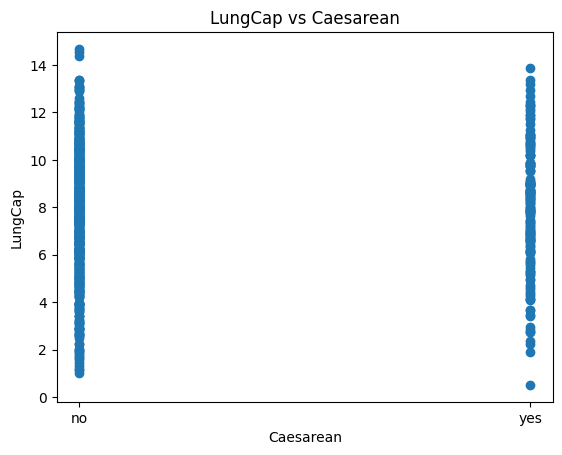

In [11]:
plt.xlabel("Caesarean")
plt.ylabel("LungCap")
plt.title("LungCap vs Caesarean")

plt.scatter(df['Caesarean'],df['LungCap(cc)'])
plt.show()

In [12]:
print(df["LungCap(cc)"][df["Caesarean"] == 'yes'].mean())
print(df["LungCap(cc)"][df["Caesarean"] == 'yes'].std())

7.968030487804877
2.6396806053860558


In [13]:
print(df["LungCap(cc)"][df["Caesarean"] == 'no'].mean())
print(df["LungCap(cc)"][df["Caesarean"] == 'no'].std())

7.832486631016042
2.670062551484292


Caesarean does not look like a very important feature, both from the graph and from the mean of LunCap when it is present and not present, whhich are quite similar. Hence in a later model we wil drop this feature and evaluate the performance.

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
df['Smoke'] = encoder1.fit_transform(df['Smoke'])
df['Gender'] = encoder2.fit_transform(df['Gender'])
df['Caesarean'] = encoder3.fit_transform(df['Caesarean'])
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,0
721,9.050,18,72.0,1,1,1
722,3.850,11,60.5,1,0,0
723,9.825,15,64.9,0,0,0


In [15]:
y = df['LungCap(cc)']
X = df.drop(['LungCap(cc)'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y , random_state= 42, test_size=0.2, shuffle=True)

In [16]:
X_train.head()

,Age( years),Height(inches),Smoke,Gender,Caesarean
446,11,59.0,0,0,0
6,8,63.3,0,1,1
423,12,73.3,1,0,1
596,6,56.4,0,0,0
411,13,68.8,1,0,0


In [17]:
X_train.reset_index(inplace = True)
X_train = X_train.drop(['index'], axis = 1)
X_train.head()

,Age( years),Height(inches),Smoke,Gender,Caesarean
0,11,59.0,0,0,0
1,8,63.3,0,1,1
2,12,73.3,1,0,1
3,6,56.4,0,0,0
4,13,68.8,1,0,0


In [18]:
X_val.reset_index(inplace = True)
X_val = X_val.drop(['index'], axis = 1)
X_val.head()

,Age( years),Height(inches),Smoke,Gender,Caesarean
0,15,69.0,0,1,0
1,15,65.8,0,0,0
2,15,65.4,0,0,0
3,13,65.6,0,1,1
4,9,63.9,0,0,1


In [19]:
y_train

446     6.300
6       4.950
423     7.800
596     3.925
411     8.675
        ...  
71      9.700
106    10.875
270     6.100
435    11.300
102     3.450
Name: LungCap(cc), Length: 580, dtype: float64

In [20]:
y_train = y_train.reset_index(drop = True)
y_train

0       6.300
1       4.950
2       7.800
3       3.925
4       8.675
        ...  
575     9.700
576    10.875
577     6.100
578    11.300
579     3.450
Name: LungCap(cc), Length: 580, dtype: float64

In [21]:
y_val = y_val.reset_index(drop = True)
y_val

0       8.325
1       9.900
2       8.575
3      11.025
4       6.175
        ...  
140     7.925
141     4.500
142     8.625
143     7.025
144     7.550
Name: LungCap(cc), Length: 145, dtype: float64

### Normalizing/Standardizing Data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
age = X_train['Age( years)'].to_numpy()
age = age.reshape(-1,1)
ht = X_train['Height(inches)'].to_numpy()
ht = ht.reshape(-1,1)
new_age = scaler1.fit_transform(age)
new_ht = scaler2.fit_transform(ht)

In [23]:
X_train['Age'] = new_age

In [24]:
X_train['Height'] = new_ht

In [25]:
X_train_scaled = X_train.drop(['Age( years)', 'Height(inches)'], axis = 1)
X_train_scaled

,Smoke,Gender,Caesarean,Age,Height
0,0,0,0,-0.338998,-0.840453
1,0,1,1,-1.086597,-0.239837
2,1,0,1,-0.089798,1.156944
3,0,0,0,-1.584997,-1.203616
4,1,0,0,0.159402,0.528393
...,...,...,...,...,...
575,0,1,0,-0.338998,1.031234
576,0,1,0,0.907002,1.464236
577,0,0,0,-0.588198,-1.063938
578,0,1,0,0.657802,1.212815


In [26]:
X_train_scaled.describe()

,Smoke,Gender,Caesarean,Age,Height
count,580.000000,580.000000,580.000000,5.800000e+02,5.800000e+02
mean,0.112069,0.503448,0.217241,-6.048801e-17,2.235759e-15
std,0.315724,0.500420,0.412724,1.000863e+00,1.000863e+00
min,0.000000,0.000000,0.000000,-2.332597e+00,-2.754043e+00
25%,0.000000,0.000000,0.000000,-5.881976e-01,-7.042667e-01
50%,0.000000,1.000000,0.000000,1.594020e-01,6.745490e-02
75%,0.000000,1.000000,0.000000,6.578017e-01,7.693374e-01
max,1.000000,1.000000,1.000000,1.654601e+00,2.344208e+00


In [27]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import linear,relu,sigmoid
from tensorflow.keras.losses import MeanSquaredError

In [28]:
agev = X_val['Age( years)'].to_numpy()
agev = agev.reshape(-1,1)
htv = X_val['Height(inches)'].to_numpy()
htv = htv.reshape(-1,1)
new_agev = scaler1.transform(agev)
new_htv = scaler2.transform(htv)
X_val['Age'] = new_agev
X_val['Height'] = new_htv
X_val_scaled = X_val.drop(['Age( years)', 'Height(inches)'], axis = 1)
X_val_scaled

,Smoke,Gender,Caesarean,Age,Height
0,0,1,0,0.657802,0.556328
1,0,0,0,0.657802,0.109358
2,0,0,0,0.657802,0.053487
3,0,1,1,0.159402,0.081423
4,0,0,1,-0.837397,-0.156030
...,...,...,...,...,...
140,0,0,1,0.159402,-0.267773
141,0,0,0,-1.086597,-0.700775
142,0,1,1,-0.338998,0.723942
143,0,0,0,-1.584997,-0.295708


### Model 1

In [29]:
model1 = Sequential([Dense(units = 15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 8, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 3, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 1, activation = "relu")])
model1.compile(
    loss = MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
model1.fit(X_train_scaled, y_train, epochs = 100)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 63.1982
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5804 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7648 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6383 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2843 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8090 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5883
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4736 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4076 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3646 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3360 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3133 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2953  
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2817 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [30]:
y_pred_val = model1.predict(X_val_scaled)
from sklearn.metrics import mean_squared_error
loss_model1 = mean_squared_error(y_pred_val,y_val)
loss_model1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1.1229014924065974

I tinkered around with the values of learning rate and epochs to get the best possible to be the above. NOTE - If you run the above cells and the loss comes out to be in the range 60-70, please run it once again, it will give the correct output.

Next we choose a simpler NN architecture and evaluate it.

In [31]:
model2 = Sequential([Dense(units = 9, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 3, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 1, activation = "relu")])
model2.compile(
    loss = MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
model2.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 49.4401
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0764 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2568 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1920 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2233 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2404 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6818 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3870
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2844 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2467 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2205  
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2001 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1885 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1796
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

NOTE - If the loss comes out to be much greater when you run it, please run the cell once again to get the correct value.

In [32]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
y_pred_val2 = model2.predict(X_val_scaled)
loss_model2 = mean_squared_error(y_pred_val2,y_val)
loss_model2

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


1.1419997753579203

The complex model does better.

Now we evaluate both the complex and simple model by dropping 'Caesarean' column.

In [33]:
X_train_scaled_new = X_train_scaled.drop(['Caesarean'],axis=1)
X_train_scaled_new.head()

,Smoke,Gender,Age,Height
0,0,0,-0.338998,-0.840453
1,0,1,-1.086597,-0.239837
2,1,0,-0.089798,1.156944
3,0,0,-1.584997,-1.203616
4,1,0,0.159402,0.528393


In [34]:
X_val_scaled_new = X_val_scaled.drop(['Caesarean'],axis=1)
X_val_scaled_new.head()

,Smoke,Gender,Age,Height
0,0,1,0.657802,0.556328
1,0,0,0.657802,0.109358
2,0,0,0.657802,0.053487
3,0,1,0.159402,0.081423
4,0,0,-0.837397,-0.156030


In [35]:
tf.random.set_seed(42)
model3 = Sequential([Dense(units = 15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 8, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 3, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 1, activation = 'relu')])
model3.compile(
    loss = MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
model3.fit(X_train_scaled_new, y_train, epochs = 100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 58.2246
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0032  
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2295
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5296
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3463 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7870 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5555 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4483 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3797 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3425
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3196 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2970
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2718
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2549 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1

In [36]:
y_pred_val3 = model3.predict(X_val_scaled_new)
loss_model3 = mean_squared_error(y_pred_val3,y_val)
loss_model3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


1.1354967784640746

In [37]:
model4 = Sequential([Dense(units = 9, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 3, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 1, activation = 'relu')])
model4.compile(
    loss = MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
model4.fit(X_train_scaled_new, y_train, epochs = 100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 65.4398
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.4761
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.8423 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7367 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4859
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5701 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0184 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6555 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4696 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3571 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2857 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2344 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1996 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1762 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [38]:
y_pred_val4 = model4.predict(X_val_scaled_new)
loss_model4 = mean_squared_error(y_pred_val4,y_val)
loss_model4

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1.1427373520207584

NOTE : If any of the above cells give abnormal losses, please run it again.

We find that the complex model with the 'Caesarean' column included gave the best result. So we proceed with it, doing some further fine-tuning to find the best value of lambda.

In [41]:
tf.random.set_seed(42)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
val_loss = []
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential([Dense(units = 15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(lambda_)),
                            Dense(units = 8, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(lambda_)),
                            Dense(units = 3, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(lambda_)),
                            Dense(units = 1, activation = "relu")])
    models[i].compile(loss = MeanSquaredError(), 
                      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))

    models[i].fit(
        X_train_scaled,y_train,
        epochs=100
    )
    val_loss.append(mean_squared_error(models[i].predict(X_val_scaled),y_val))
    print(f"Finished lambda = {lambda_}")

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 65.2879
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.5446 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1043 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1317 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2654 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4587 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9116 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6554 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5023 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3835 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3051 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2536 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2144 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1809 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [42]:
val_loss

[1.1449045751910403,
 1.2374831030841207,
 1.1513759411168798,
 1.099811463899337,
 1.0999521604833316,
 1.1003270951551345,
 1.103012638798506]

We find models[3] is the best, with lambda = 0.05, giving a loss of only 1.099.

In [43]:
models[3].summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 749 (2.93 KB)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 500 (1.96 KB)

In [44]:
final_val_loss = (mean_squared_error(models[3].predict(X_val_scaled),y_val))
final_val_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


1.099811463899337

This is our final val loss from NN model.

In [72]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the RandomForestRegressor
y_pred_rf = rf_regressor.predict(X_val_scaled)
print(f'RandomForestRegressor Mean Squared Error: {mean_squared_error(y_val, y_pred_rf)}')

# Train the XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the XGBRegressor
y_pred_xgb = xgb_regressor.predict(X_val_scaled)
print(f'XGBRegressor Mean Squared Error: {mean_squared_error(y_val, y_pred_xgb)}')

RandomForestRegressor Mean Squared Error: 1.3975625092405612
XGBRegressor Mean Squared Error: 1.6934433520541778


NN model is clearly better.

## Trying SMOTE

We try SMOTE for synthentic data generation with regard to minority classes.

In [53]:
X_train = X_train.drop(['Age','Height'],axis=1)
X_train

,Age( years),Height(inches),Smoke,Gender,Caesarean
0,11,59.0,0,0,0
1,8,63.3,0,1,1
2,12,73.3,1,0,1
3,6,56.4,0,0,0
4,13,68.8,1,0,0
...,...,...,...,...,...
575,11,72.4,0,1,0
576,16,75.5,0,1,0
577,10,57.4,0,0,0
578,15,73.7,0,1,0


In [56]:
X_val = X_val.drop(['Age','Height'],axis=1)
X_val

,Age( years),Height(inches),Smoke,Gender,Caesarean
0,15,69.0,0,1,0
1,15,65.8,0,0,0
2,15,65.4,0,0,0
3,13,65.6,0,1,1
4,9,63.9,0,0,1
...,...,...,...,...,...
140,13,63.1,0,0,1
141,8,60.0,0,0,0
142,11,70.2,0,1,1
143,6,62.9,0,0,0


In [57]:
from imblearn.over_sampling import SMOTENC
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Identify the indices of the categorical features
categorical_features = ['Caesarean', 'Smoke', 'Gender']
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# Bin the continuous target variable into discrete categories
num_bins = 9  # Define the number of bins
y_binned = pd.cut(y_train, bins=num_bins, labels=False)

# Instantiate the SMOTENC object
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Apply SMOTENC to the binned target variable to generate synthetic samples
X_res, y_binned_res = smote_nc.fit_resample(X_train, y_binned)

# Map the binned target back to continuous values using the mean of the bins
bin_edges = np.linspace(y.min(), y.max(), num_bins + 1)
y_res = np.interp(y_binned_res, np.arange(num_bins), (bin_edges[:-1] + bin_edges[1:]) / 2)

# Display the shapes of the resampled dataset
print(f'Original dataset shape: {X_train.shape}')
print(f'Resampled dataset shape: {X_res.shape}')


Original dataset shape: (580, 5)
Resampled dataset shape: (1197, 5)


In [59]:
scaler3 = StandardScaler()
scaler4 = StandardScaler()
agen = X_res['Age( years)'].to_numpy()
agen = agen.reshape(-1,1)
htn = X_res['Height(inches)'].to_numpy()
htn = htn.reshape(-1,1)
new_agen = scaler3.fit_transform(agen)
new_htn = scaler4.fit_transform(htn)


X_res['Age'] = new_agen
X_res['Height'] = new_htn
X_res_scaled = X_res.drop(['Age( years)', 'Height(inches)'], axis = 1)
X_res_scaled

,Smoke,Gender,Caesarean,Age,Height
0,0,0,0,-0.139980,-0.522151
1,0,1,1,-0.735559,-0.082556
2,1,0,1,0.058546,0.939759
3,0,0,0,-1.132612,-0.787953
4,1,0,0,0.257073,0.479718
...,...,...,...,...,...
1192,0,1,0,1.249705,1.260239
1193,0,1,0,1.051178,1.154982
1194,0,1,0,1.051178,1.159395
1195,0,1,0,1.051178,1.204118


In [63]:
agenv = X_val['Age( years)'].to_numpy()
agev = agev.reshape(-1,1)
htv = X_val['Height(inches)'].to_numpy()
htv = htv.reshape(-1,1)
new_agevn = scaler3.transform(agev)
new_htvn = scaler4.transform(htv)
X_val['Age'] = new_agevn
X_val['Height'] = new_htvn
X_val_scaled_new = X_val.drop(['Age( years)', 'Height(inches)'], axis = 1)
X_val_scaled_new

,Smoke,Gender,Caesarean,Age,Height
0,0,1,0,0.654125,0.500164
1,0,0,0,0.654125,0.173023
2,0,0,0,0.654125,0.132130
3,0,1,1,0.257073,0.152577
4,0,0,1,-0.537033,-0.021217
...,...,...,...,...,...
140,0,0,1,0.257073,-0.103002
141,0,0,0,-0.735559,-0.419920
142,0,1,1,-0.139980,0.622842
143,0,0,0,-1.132612,-0.123448


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_res_scaled, y_res)

# Predict and evaluate the model
y_pred = regressor.predict(X_val_scaled_new)
print(f'Mean Squared Error: {mean_squared_error(y_val, y_pred)}')

Mean Squared Error: 1.6347519225817613


In [68]:
tf.random.set_seed(1234)
modeln = Sequential([Dense(units = 15, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 8, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 3, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.01)),
                    Dense(units = 1, activation = 'relu')])
modeln.compile(
    loss = MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
modeln.fit(X_res_scaled, y_res, epochs = 500)

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 56.7163
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1949
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7070
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4028
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3328
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2994
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2780
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2599
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2472
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2357
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2259
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2187
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2107
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2055
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1993
Epo

In [69]:
mean_squared_error(modeln.predict(X_val_scaled_new),y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1.5009234178147286

We get a much higher value of loss, so our previous model models[3] was our overall best with a loss of 1.099.